In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr



In [2]:
dataset = ['BAC']
for datasets in dataset :
    Ticker = yf.Ticker(datasets)
    data = Ticker.history(start='2023-09-01', end='2023-10-13')
    filename=f'{dataset}_data.csv'
    data.to_csv(filename)
    print(f'Download data for {dataset} and saved as {filename}')

Download data for ['BAC'] and saved as ['BAC']_data.csv


In [3]:
Ticker = 'BAC'

start_date = '2023-09-01'
end_date = '2023-10-13'
data = yf.download(Ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [11]:
symbols = data.columns

In [12]:
symbols

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
noa = len(symbols)

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-01,28.760000,29.129999,28.760000,28.980000,28.980000,35192000
2023-09-05,28.940001,29.120001,28.500000,28.650000,28.650000,46543600
2023-09-06,28.400000,28.559999,28.120001,28.389999,28.389999,45022600
2023-09-07,28.410000,28.549999,28.059999,28.129999,28.129999,35023600
2023-09-08,28.120001,28.379999,27.959999,28.360001,28.360001,36513900


In [6]:
rets = np.log(data/ data.shift(1))

In [7]:
rets.mean() * 252

Open        -0.578344
High        -0.656758
Low         -0.699286
Close       -0.670317
Adj Close   -0.670317
Volume       2.061289
dtype: float64

In [8]:
rets.cov() * 252

,Open,High,Low,Close,Adj Close,Volume
Open,0.057154,0.045842,0.041806,0.023788,0.023788,-0.066984
High,0.045842,0.049081,0.041620,0.032437,0.032437,0.038644
Low,0.041806,0.041620,0.043735,0.033937,0.033937,-0.160033
Close,0.023788,0.032437,0.033937,0.038195,0.038195,-0.167998
Adj Close,0.023788,0.032437,0.033937,0.038195,0.038195,-0.167998
Volume,-0.066984,0.038644,-0.160033,-0.167998,-0.167998,18.884858


In [15]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [16]:
weights

array([0.28583352, 0.23435132, 0.06905591, 0.05724406, 0.03948721,
       0.31402798])

In [17]:
np.sum(rets.mean() * weights) * 252

0.2149497488272818

# ***Variance***

In [18]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

1.8591287390416456

# **Portfolio Standard Deviation Or Volatility **

In [19]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

1.3634987125192475

In [21]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T,
                                np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

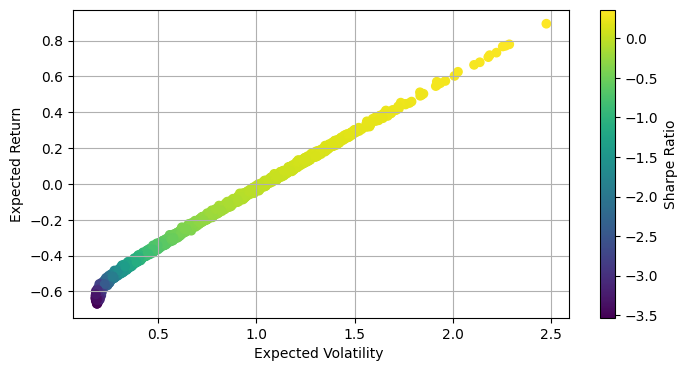

In [22]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('Expected Volatility ')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')

In [23]:
def statistics(weights):



    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret/pvol])

In [24]:
import scipy.optimize as sco

In [25]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [26]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [27]:
bnds = tuple((0, 1) for x in range(noa))

In [28]:
noa * [1. /noa,]

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [29]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa], method='SLSQP', bounds= bnds, constraints=cons)

CPU times: user 25 ms, sys: 0 ns, total: 25 ms
Wall time: 25.1 ms


In [30]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.4743314691118353
       x: [ 0.000e+00  8.465e-15  1.221e-15  1.471e-15  9.714e-16
            1.000e+00]
     nit: 2
     jac: [ 1.314e-01  1.521e-01  1.569e-01  1.500e-01  1.500e-01
           -0.000e+00]
    nfev: 14
    njev: 2

In [31]:
opts['x'].round(3)

array([0., 0., 0., 0., 0., 1.])

In [32]:
statistics(opts['x'].round(3))

array([2.06128861, 4.34567121, 0.47433147])

# ***The Expected Return is About 6.1% And The Expected Volatility is About 3.45% And Sharpe Ratio is 4.74%

In [33]:
def min_func_variance(weights):
    return statistics(weights)[1] **2

In [34]:
optv = sco.minimize(min_func_variance, noa * [1. /noa],
                       method='SLSQP', bounds=bnds, constraints=cons)

In [35]:
optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.03230301280815925
       x: [ 2.825e-01  0.000e+00  0.000e+00  3.542e-01  3.542e-01
            8.988e-03]
     nit: 11
     jac: [ 6.480e-02  7.256e-02  6.883e-02  6.454e-02  6.454e-02
            6.356e-02]
    nfev: 77
    njev: 11

In [36]:
optv['x'].round(3)

array([0.283, 0.   , 0.   , 0.354, 0.354, 0.009])

# **For The Expected Return, Volatility, And Sharpe Ratio**

In [37]:
statistics(optv['x']).round(3)

array([-0.62 ,  0.18 , -3.448])

# **Efficient Frontier**

In [40]:
cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
        {'type': 'eq','fun': lambda x: np.sum(x) - 1})

In [41]:
bnds = tuple((0, 1) for x in weights)

In [42]:
def min_func_port(weights):
    return statistics(weights)[1]

In [43]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols =[]
for tret in trets :
    cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0]  - tret},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds = bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 5.14 s, sys: 45.5 ms, total: 5.18 s
Wall time: 6.36 s


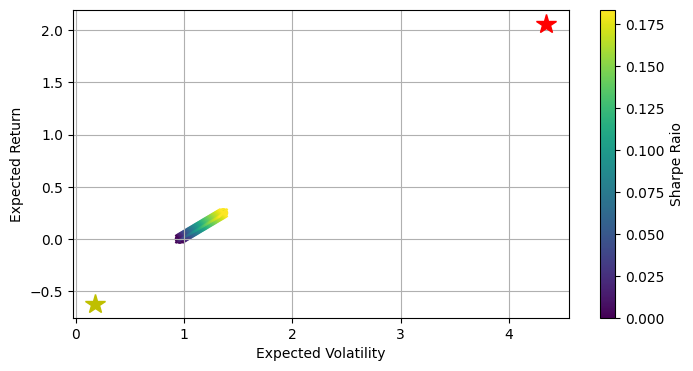

In [45]:
plt.figure(figsize=(8, 4))
plt.scatter(tvols, trets, c=trets/tvols, marker='o')
# Random Portfolio Composition
plt.scatter(tvols, trets, c=trets/tvols, marker='x')
#Efficient Frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize=15.0)
#Portfolio With Highest Sharpe Ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize=15.0)
#Minimum Variance Portfolio
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Raio')

# ***Capital Market Line***

In [46]:
import scipy.interpolate as sci

In [47]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [49]:
tck = sci.splrep(evols, erets)

In [50]:
def f(x):
    'Efficient Frontier Function'
    return sci.splev(x, tck, der=0)

def df(x):
    'First Derivative of efficient Frontier Functions'
    return sci.splev(x, tck, der=1)

In [51]:
def equations(p, rf=0.052):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [52]:
opt = sco.fsolve(equations, [0.052, 0.5, 0.15] )

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [53]:
opt

array([0.03400087, 0.46328676, 3.62543721])

In [54]:
np.round(equations(opt), 6)

array([-1.00000e-06,  5.34390e-02, -1.95099e-01])

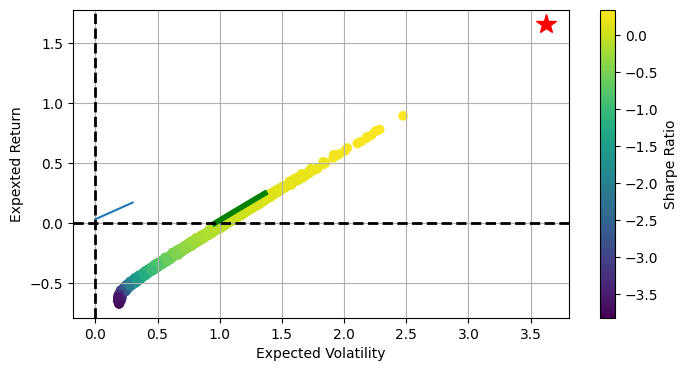

In [57]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=(prets - 0.052) / pvols, marker='o')
# Random Portfolio Return
plt.plot(evols, erets, 'g', lw=4.0)
#Efficinet Frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
#Capital Market Line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('Expected Volatility')
plt.ylabel('Expexted Return')
plt.colorbar(label='Sharpe Ratio')